<h1>2022.04.28. 강의 시간내 실습 - (2)</h1>

In [14]:
import warnings

warnings.filterwarnings('ignore')

In [15]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df_wine_feature = wine.feature_names
df_wine_data = pd.DataFrame(wine.data, columns = df_wine_feature)
df_wine_label = pd.DataFrame(wine.target, columns = ['label'])

In [16]:
data = pd.concat([df_wine_data, df_wine_label], axis=1)

data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [17]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [21]:
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(13,))
x = Dense(10, activation='relu')(inputs)
x2 = Dense(8, activation='relu')(x)
x3 = Dense(6, activation='relu')(x2)
output=Dense(3,activation='softmax')(x3)

model = Model(inputs=inputs, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_40 (Dense)            (None, 10)                140       
                                                                 
 dense_41 (Dense)            (None, 8)                 88        
                                                                 
 dense_42 (Dense)            (None, 6)                 54        
                                                                 
 dense_43 (Dense)            (None, 3)                 21        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
5/5 [==============================] - 2s 118ms/step - loss: 33.1524 - accuracy: 0.3169 - val_loss: 29.1702 - val_accuracy: 0.3889
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 26.5457 - accuracy: 0.3169 - val_loss: 23.8790 - val_accuracy: 0.3889
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 21.9103 - accuracy: 0.3028 - val_loss: 22.7631 - val_accuracy: 0.1667
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 19.8225 - accuracy: 0.2958 - val_loss: 18.2984 - val_accuracy: 0.2778
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 16.4944 - accuracy: 0.3028 - val_loss: 15.4702 - val_accuracy: 0.4167
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 13.8582 - accuracy: 0.3380 - val_loss: 12.3411 - val_accuracy: 0.4167
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 10.6395 - accuracy: 0.3944 - val_loss: 9.5773 - val_accuracy: 0.1667
Epoch 

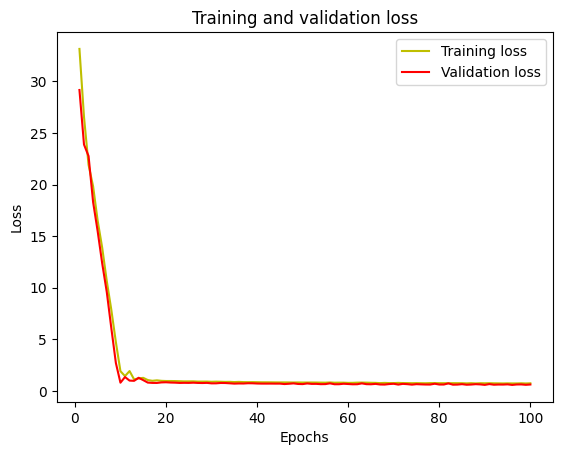

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

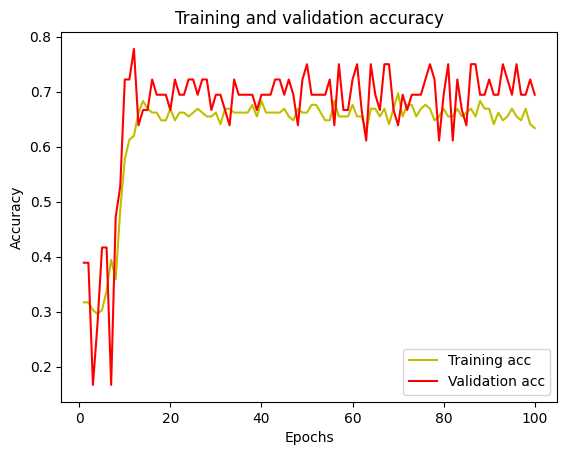

In [33]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()